>   pandas (pd): Biblioteca principal para manipulação de dados.
>   numpy (np): Biblioteca para operações numéricas.
>   seaborn (sns): Biblioteca para visualização de dados.
>   matplotlib.pyplot (plt): Biblioteca para criar gráficos.
>   altair (alt): Biblioteca para visualização de dados interativos.


In [2]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

>   pd.set_option: Configura o Pandas para exibir todas as linhas e colunas do DataFrame.
> df = pd.read_csv("data.csv"): Carrega o dataset "data.csv" em um DataFrame chamado df.

In [3]:

df = pd.read_csv("data.csv")

>   df.dropna(inplace=True): Remove todas as linhas com valores ausentes.
>   df.drop_duplicates(inplace=True): Remove todas as linhas duplicadas.

In [ ]:
# Limpeza dos Dados
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


>   df['sex_of_casualty'].map({1: 'M', 2: 'F'}): Mapeia os valores da coluna sex_of_casualty de 1 para 'M' (Masculino) e 2 para 'F' (Feminino).
>   df_filtered: Filtra o DataFrame para remover valores inválidos nas colunas sex_of_casualty e age_band_of_casualty.

In [ ]:
# Mapeie os valores 1 para 'M' e 2 para 'F'
df['sex_of_casualty'] = df['sex_of_casualty'].map({1: 'M', 2: 'F'})


In [1]:
# Filtrar valores inválidos em 'sex_of_casualty' e 'age_band_of_casualty'
df_filtered = df[(df['sex_of_casualty'] != -1) & (df['sex_of_casualty'] != 9) & (df['age_band_of_casualty'] != -1)]
df_sampled = df_filtered

NameError: name 'df' is not defined

>   # Pergunta Orientada a Dados: "Quais são os padrões e tendências na gravidade dos acidentes de trânsito com base no perfil demográfico das vítimas (idade e sexo)?"


>   pd.crosstab: Cria uma tabela de contingência mostrando a contagem de acidentes por gravidade e sexo.
>   apply(lambda r: r/r.sum()*100, axis=1): Calcula a frequência relativa de acidentes para cada nível de gravidade.
>   print: Exibe a contagem absoluta e relativa dos acidentes.

In [ ]:
# Análise e Visualização da Gravidade dos Acidentes por Sexo
severity_sex_contingency = pd.crosstab(df_filtered['casualty_severity'], df_filtered['sex_of_casualty'])
severity_sex_rate = severity_sex_contingency.apply(lambda r: r/r.sum()*100, axis=1)
print("Contagem de acidentes por gravidade e sexo:")
print(severity_sex_contingency)
print("\nFrequência relativa de acidentes por gravidade e sexo:")
print(severity_sex_rate)

Contagem de acidentes por gravidade e sexo:
sex_of_casualty        F      M
casualty_severity              
1                    195    592
2                   3748   7877
3                  19072  28342

Frequência relativa de acidentes por gravidade e sexo:
sex_of_casualty            F          M
casualty_severity                      
1                  24.777637  75.222363
2                  32.240860  67.759140
3                  40.224406  59.775594


>   alt.Chart(df_filtered).mark_bar(): Cria um gráfico de barras usando o DataFrame filtrado.
>   encode: Define os eixos x (sexo das vítimas) e y (contagem de acidentes) e a cor das barras (gravidade dos acidentes).
>   properties: Define o título do gráfico.
>   interactive(): Adiciona interatividade ao gráfico.
>   display(): Exibe o gráfico.

In [ ]:
# Habilita o VegaFusion Data Transformer
alt.data_transformers.enable('vegafusion')

# ... (seu código para criar df_sampled OU df_agg, escolha um dos dois)

# Cria o gráfico com os dados preparados (df_sampled ou df_agg)
bar_chart_severity_sex = alt.Chart(df_sampled).mark_bar().encode(
    x=alt.X('sex_of_casualty:N', axis=alt.Axis(labelAngle=-45), title='Sexo'),
    y=alt.Y('count()', title='Contagem'),  # ou 'count:Q' se usar df_agg
    color=alt.Color('casualty_severity:N', title='Gravidade'),
    tooltip=['sex_of_casualty', 'casualty_severity', 'count()']  # ou 'count' se usar df_agg
).properties(
    title='Gravidade dos Acidentes por Sexo'
).interactive()

bar_chart_severity_sex.display()

alt.Chart(...)

>    Similar à análise por sexo, mas agora agrupando por faixa etária (age_band_of_casualty).

In [ ]:
# Análise e Visualização da Gravidade dos Acidentes por Faixa Etária
severity_age_contingency = pd.crosstab(df_filtered['casualty_severity'], df_filtered['age_band_of_casualty'])
severity_age_rate = severity_age_contingency.apply(lambda r: r/r.sum()*100, axis=1)
print("Contagem de acidentes por gravidade e faixa etária:")
print(severity_age_contingency)
print("\nFrequência relativa de acidentes por gravidade e faixa etária:")
print(severity_age_rate)

Contagem de acidentes por gravidade e faixa etária:
age_band_of_casualty   1     2     3     4     5      6     7     8     9   \
casualty_severity                                                            
1                       9     0    11    77    71    153    94    95    90   
2                     159   245   622  1312  1212   2152  1581  1503  1363   
3                     829  1330  2352  4939  5447  10567  7732  6244  4389   

age_band_of_casualty    10    11  
casualty_severity                 
1                       79   108  
2                      784   707  
3                     2119  1627  

Frequência relativa de acidentes por gravidade e faixa etária:
age_band_of_casualty        1         2         3          4          5   \
casualty_severity                                                          
1                     1.143583  0.000000  1.397713   9.783990   9.021601   
2                     1.365979  2.104811  5.343643  11.271478  10.412371   
3             

>   Similar ao gráfico de barras por sexo, mas agora agrupando por faixa etária (age_band_of_casualty).

In [ ]:

# Gráfico de barras empilhadas para gravidade por faixa etária
bar_chart_severity_age = alt.Chart(df_filtered).mark_bar().encode(
    x=alt.X('age_band_of_casualty:N', axis=alt.Axis(labelAngle=-45), title='Faixa Etária'),
    y=alt.Y('count()', title='Contagem'),
    color=alt.Color('casualty_severity:N', title='Gravidade'),
    tooltip=['age_band_of_casualty', 'casualty_severity', 'count()']
).properties(
    title='Gravidade dos Acidentes por Faixa Etária'
).interactive()

bar_chart_severity_age.display()

alt.Chart(...)

>   groupby('casualty_severity')['age_of_casualty'].agg(['mean', 'std']): Agrupa os dados por gravidade (casualty_severity) e calcula a média e o desvio padrão da idade das vítimas (age_of_casualty).
>   reset_index(): Reseta o índice do DataFrame para torná-lo mais legível.
>   print: Exibe as estatísticas calculadas

In [ ]:
# Medidas Estatísticas por Gravidade
# Média e Desvio Padrão da Idade das Vítimas para Cada Nível de Gravidade
severity_age_stats = df_filtered.groupby('casualty_severity')['age_of_casualty'].agg(['mean', 'std']).reset_index()
print("\nMédia e Desvio Padrão da Idade das Vítimas por Gravidade:")
print(severity_age_stats)



Média e Desvio Padrão da Idade das Vítimas por Gravidade:
   casualty_severity       mean        std
0                  1  46.461245  22.316927
1                  2  39.775773  20.485345
2                  3  36.817488  18.411480


>   plt.figure(figsize=(12, 6)): Cria uma figura com tamanho especificado.
>   sns.barplot: Cria um gráfico de barras mostrando a média da idade das vítimas por gravidade.
>   plt.errorbar: Adiciona barras de erro ao gráfico para representar o desvio padrão.
>   plt.title, plt.xlabel, plt.ylabel: Define o título do gráfico e os rótulos dos eixos.
>   plt.show(): Exibe o gráfico.

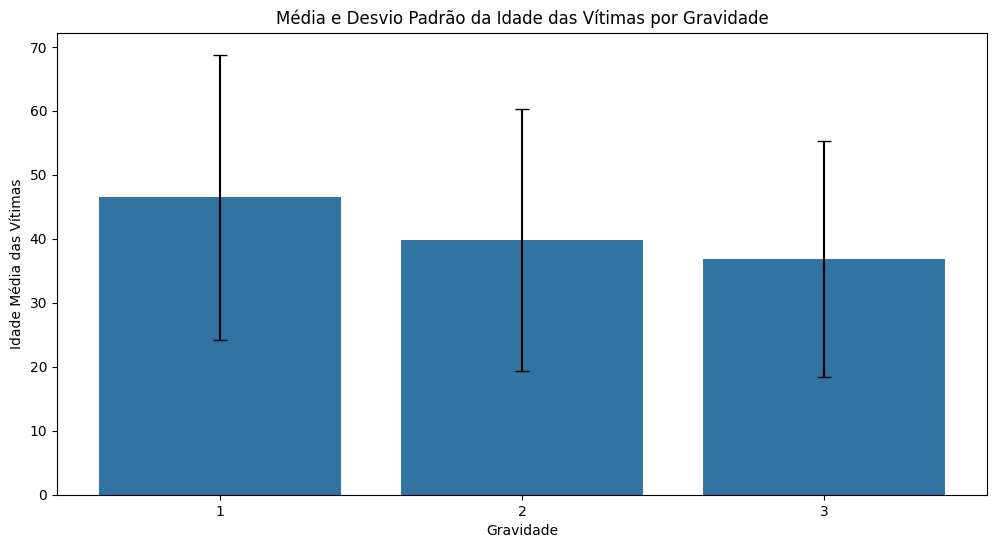

In [ ]:
# Visualização da Média e Desvio Padrão da Idade das Vítimas por Gravidade
plt.figure(figsize=(12, 6))
sns.barplot(x='casualty_severity', y='mean', data=severity_age_stats)
plt.errorbar(x=range(len(severity_age_stats)), y=severity_age_stats['mean'], yerr=severity_age_stats['std'], fmt='none', c='black', capsize=5)
plt.title('Média e Desvio Padrão da Idade das Vítimas por Gravidade')
plt.xlabel('Gravidade')
plt.ylabel('Idade Média das Vítimas')
plt.show()